# Creating a Stress Detection Tool using Data From Subreddits: Modeling

This notebook will be split into three parts.  In parts one and two, I will be testing out three different models on each of the train/test sets I created in the previous notebook (the first one using count vectors, and the second using tf-idf).  The three models I will be trying are Naive Bayes, Logistic Regression, and Decision Trees.  I will be evaluating the performance of each model throughout the notebook, but in part three I will decide which model to proceed with, do some further testing, and review some ideas to further improve the model.

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import scikitplot as skplt
import plotly.express as px

import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Part 1

#### Import first train/test from pickle

In [3]:
pkl_filename = "x_train_CV.pkl"
with open(pkl_filename, 'rb') as file:
    x_train = pickle.load(file)

pkl_filename = "x_test_CV.pkl"
with open(pkl_filename, 'rb') as file:
    x_test = pickle.load(file)
    
pkl_filename = "y_train_CV.pkl"
with open(pkl_filename, 'rb') as file:
    y_train = pickle.load(file)
    
pkl_filename = "y_test_CV.pkl"
with open(pkl_filename, 'rb') as file:
    y_test = pickle.load(file)
    
pkl_filename = "cv_vectorizer.pickle"
with open(pkl_filename, 'rb') as file:
    vect = pickle.load(file)

#### Dummy Classifier

In [4]:
clf_dummy = DummyClassifier(random_state=42) 
clf_dummy.fit(x_train, y_train)
y_pred = clf_dummy.predict(x_test)

In [5]:
print("Dummy Classifier using Count vectors Accuracy is {p}%".format(p =round (accuracy_score(y_pred,y_test)*100, 2)))

Dummy Classifier using Count vectors Accuracy is 64.23%


In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   no stress       0.64      1.00      0.78       826
      stress       0.00      0.00      0.00       460

    accuracy                           0.64      1286
   macro avg       0.32      0.50      0.39      1286
weighted avg       0.41      0.64      0.50      1286



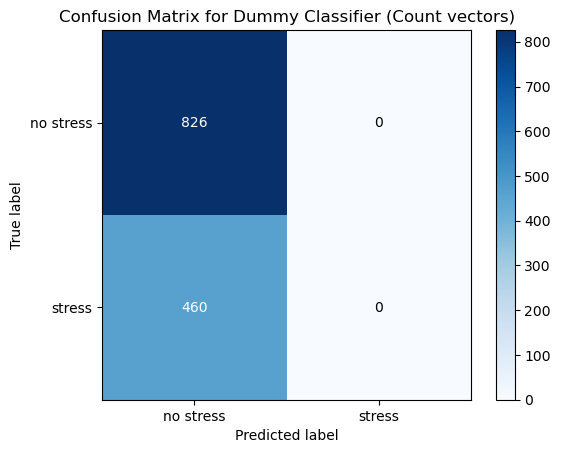

In [7]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for Dummy Classifier (Count vectors)')
plt.show()

* Here I am checking the value counts to make sure the confusion matrix results make sense

In [8]:
y_train.value_counts(normalize=True)

no stress    0.637613
stress       0.362387
Name: stress_label, dtype: float64

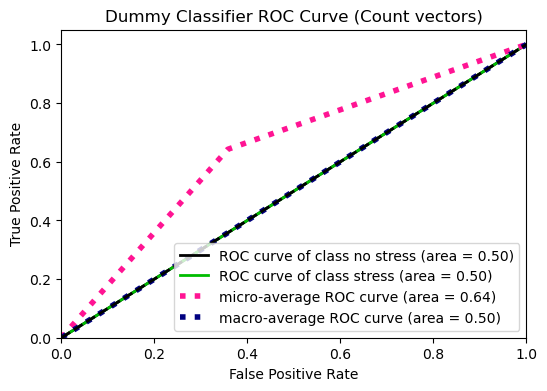

In [9]:
y_pred_proba = clf_dummy.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                       title="Dummy Classifier ROC Curve (Count vectors)", figsize=(6, 4));

#### Naive Bayes

In [10]:
mb=MultinomialNB()
m1=mb.fit(x_train,y_train).predict(x_test)

In [11]:
print("Naive Bayes Model using Count vectors Accuracy is {p}%".format(p =round (accuracy_score(m1,y_test)*100, 2)))

Naive Bayes Model using Count vectors Accuracy is 79.24%


In [12]:
print(classification_report(y_test, m1))

              precision    recall  f1-score   support

   no stress       0.93      0.73      0.82       826
      stress       0.65      0.91      0.76       460

    accuracy                           0.79      1286
   macro avg       0.79      0.82      0.79      1286
weighted avg       0.83      0.79      0.80      1286



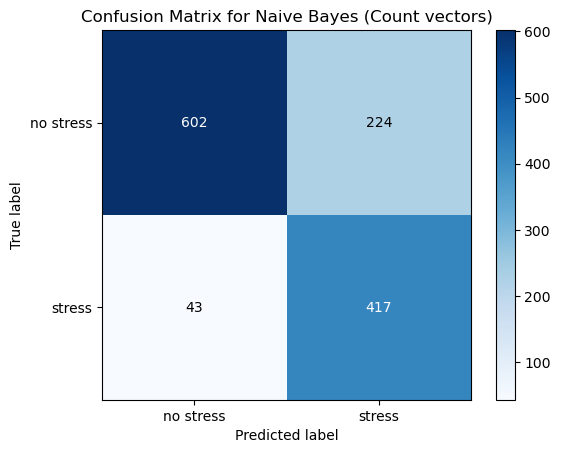

In [13]:
skplt.metrics.plot_confusion_matrix(y_test, m1, normalize=False, title = 'Confusion Matrix for Naive Bayes (Count vectors)')
plt.show()

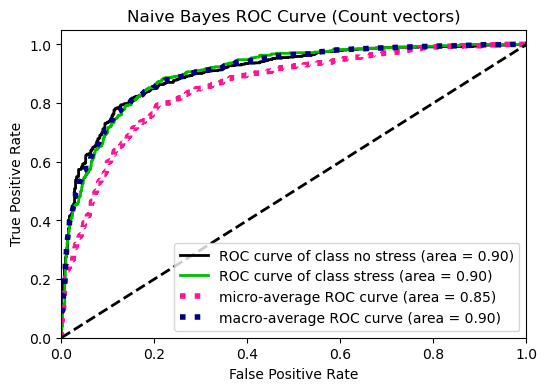

In [14]:
y_pred_proba = mb.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                       title="Naive Bayes ROC Curve (Count vectors)", figsize=(6, 4));

#### Logistic Regression

In [15]:
m2 = LogisticRegression()
m2.fit(x_train, y_train)
score = m2.score(x_test,y_test)
y_pred = m2.predict(x_test)

In [16]:
print("Logistic Regression Model using Count vectors Accuracy is {p}%".format(p =round (score*100, 2)))

Logistic Regression Model using Count vectors Accuracy is 80.95%


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   no stress       0.84      0.87      0.85       826
      stress       0.75      0.71      0.73       460

    accuracy                           0.81      1286
   macro avg       0.79      0.79      0.79      1286
weighted avg       0.81      0.81      0.81      1286



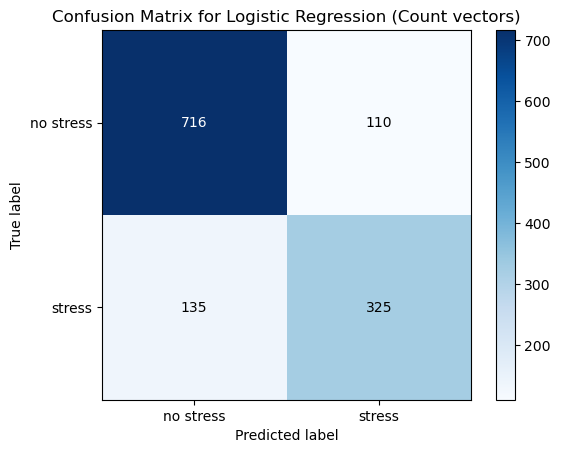

In [18]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for Logistic Regression (Count vectors)')
plt.show()

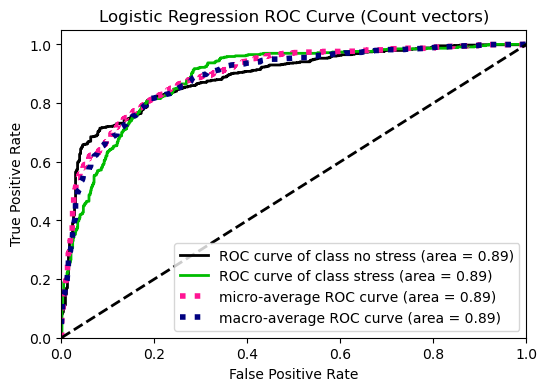

In [19]:
y_pred_proba = m2.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                       title="Logistic Regression ROC Curve (Count vectors)", figsize=(6, 4));

#### Decision Tree

In [20]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
m3=d.predict(x_test)

In [21]:
print("Decision Tree Model using Count vectors Accuracy is {p}%".format(p =round (accuracy_score(y_test,m3)*100, 2)))

Decision Tree Model using Count vectors Accuracy is 71.38%


In [22]:
print(classification_report(y_test, m3))

              precision    recall  f1-score   support

   no stress       0.77      0.78      0.78       826
      stress       0.60      0.59      0.60       460

    accuracy                           0.71      1286
   macro avg       0.69      0.69      0.69      1286
weighted avg       0.71      0.71      0.71      1286



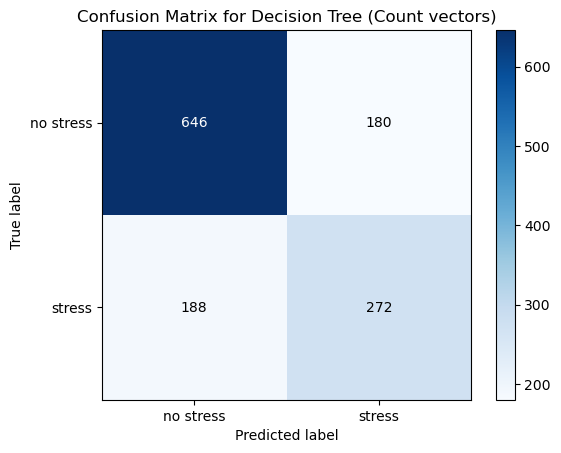

In [23]:
skplt.metrics.plot_confusion_matrix(y_test, m3, normalize=False, title = 'Confusion Matrix for Decision Tree (Count vectors)')
plt.show()

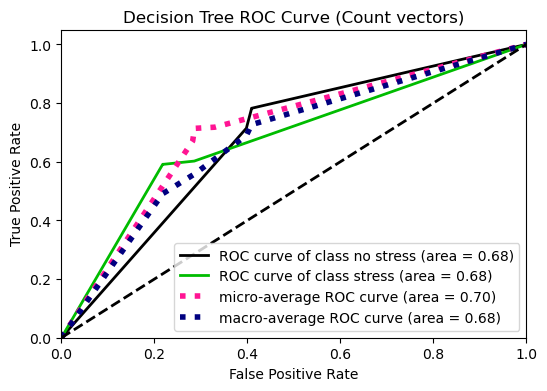

In [24]:
y_pred_proba = d.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                       title="Decision Tree ROC Curve (Count vectors)", figsize=(6, 4));

## Part 2

#### Import second train/test from pickle

In [25]:
pkl_filename = "x_train_TFID.pkl"
with open(pkl_filename, 'rb') as file:
    x_train2 = pickle.load(file)

pkl_filename = "x_test_TFID.pkl"
with open(pkl_filename, 'rb') as file:
    x_test2 = pickle.load(file)
    
pkl_filename = "y_train_TFID.pkl"
with open(pkl_filename, 'rb') as file:
    y_train2 = pickle.load(file)
    
pkl_filename = "y_test_TFID.pkl"
with open(pkl_filename, 'rb') as file:
    y_test2 = pickle.load(file)
    
pkl_filename = "tfidf_vectorizer.pickle"
with open(pkl_filename, 'rb') as file:
    vect2 = pickle.load(file)

#### Dummy Classifier

In [26]:
clf_dummy = DummyClassifier(random_state=42) 
clf_dummy.fit(x_train2, y_train2)
y_pred = clf_dummy.predict(x_test2)

In [27]:
print("Dummy Classifier using tf-idf Accuracy is {p}%".format(p =round (accuracy_score(y_pred,y_test2)*100, 2)))

Dummy Classifier using tf-idf Accuracy is 64.05%


In [28]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

   no stress       0.64      1.00      0.78      1087
      stress       0.00      0.00      0.00       610

    accuracy                           0.64      1697
   macro avg       0.32      0.50      0.39      1697
weighted avg       0.41      0.64      0.50      1697



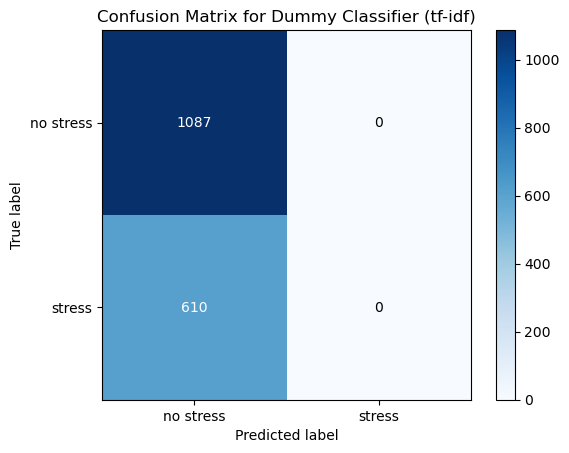

In [29]:
skplt.metrics.plot_confusion_matrix(y_test2, y_pred, normalize=False, title = 'Confusion Matrix for Dummy Classifier (tf-idf)')
plt.show()

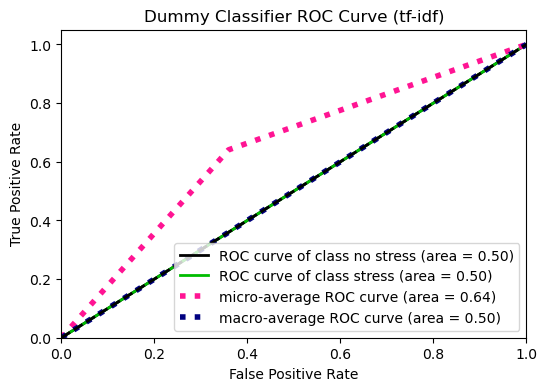

In [30]:
y_pred_proba = clf_dummy.predict_proba(x_test2)

skplt.metrics.plot_roc_curve(y_test2, y_pred_proba,
                       title="Dummy Classifier ROC Curve (tf-idf)", figsize=(6, 4));

#### Naive Bayes

In [31]:
mb=MultinomialNB()
m1=mb.fit(x_train2,y_train2).predict(x_test2)

In [32]:
print("Naive Bayes Model using tf-idf Accuracy is {p}%".format(p =round (accuracy_score(m1,y_test2)*100, 2)))

Naive Bayes Model using tf-idf Accuracy is 81.2%


In [33]:
print(classification_report(y_test2, m1))

              precision    recall  f1-score   support

   no stress       0.80      0.95      0.87      1087
      stress       0.86      0.57      0.68       610

    accuracy                           0.81      1697
   macro avg       0.83      0.76      0.78      1697
weighted avg       0.82      0.81      0.80      1697



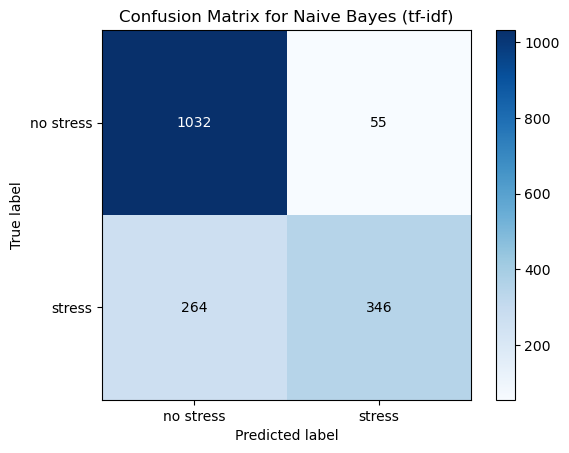

In [34]:
skplt.metrics.plot_confusion_matrix(y_test2, m1, normalize=False, title = 'Confusion Matrix for Naive Bayes (tf-idf)')
plt.show()

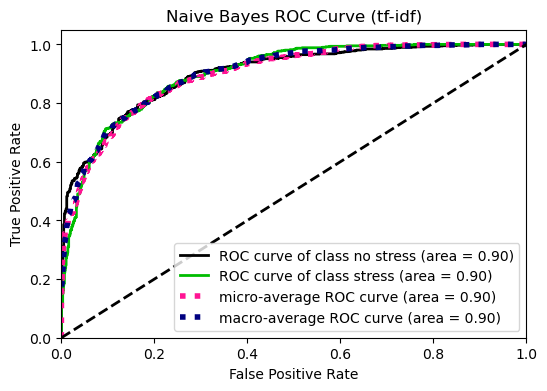

In [35]:
y_pred_proba = mb.predict_proba(x_test2)

skplt.metrics.plot_roc_curve(y_test2, y_pred_proba,
                       title="Naive Bayes ROC Curve (tf-idf)", figsize=(6, 4));

#### Logistic Regression

In [36]:
m2 = LogisticRegression()
m2.fit(x_train2, y_train2)
score = m2.score(x_test2,y_test2)
y_pred = m2.predict(x_test2)

In [37]:
print("Logistic Regression Model using tf-idf Accuracy is {p}%".format(p =round (score*100, 2)))

Logistic Regression Model using tf-idf Accuracy is 81.61%


In [38]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

   no stress       0.81      0.93      0.87      1087
      stress       0.83      0.62      0.71       610

    accuracy                           0.82      1697
   macro avg       0.82      0.77      0.79      1697
weighted avg       0.82      0.82      0.81      1697



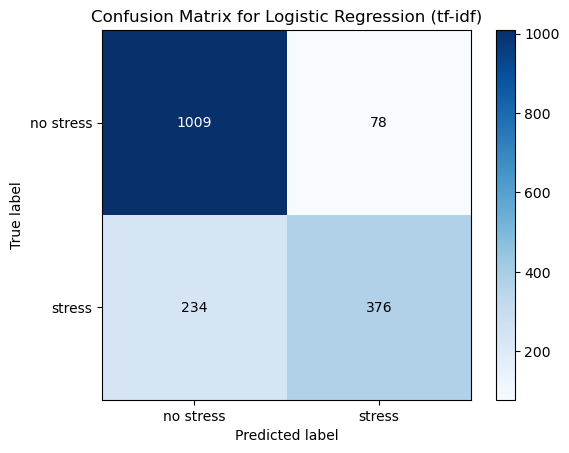

In [39]:
skplt.metrics.plot_confusion_matrix(y_test2, y_pred, normalize=False, title = 'Confusion Matrix for Logistic Regression (tf-idf)')
plt.show()

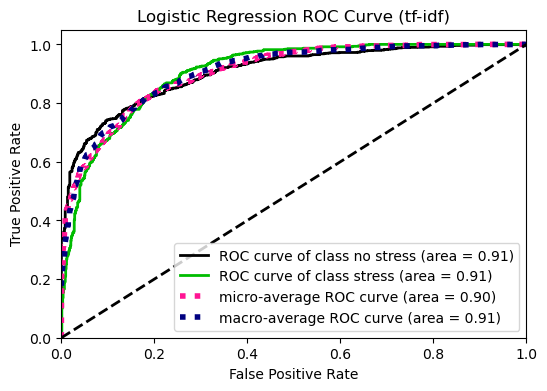

In [40]:
y_pred_proba = m2.predict_proba(x_test2)

skplt.metrics.plot_roc_curve(y_test2, y_pred_proba,
                       title="Logistic Regression ROC Curve (tf-idf)", figsize=(6, 4));

#### Decision Tree

In [41]:
d=DecisionTreeClassifier()
d.fit(x_train2,y_train2)
m3=d.predict(x_test2)

In [42]:
print("Decision Tree Model using tf-idf Accuracy is {p}%".format(p =round (accuracy_score(y_test2,m3)*100, 2)))

Decision Tree Model using tf-idf Accuracy is 69.71%


In [43]:
print(classification_report(y_test2, m3))

              precision    recall  f1-score   support

   no stress       0.77      0.76      0.76      1087
      stress       0.58      0.59      0.58       610

    accuracy                           0.70      1697
   macro avg       0.67      0.67      0.67      1697
weighted avg       0.70      0.70      0.70      1697



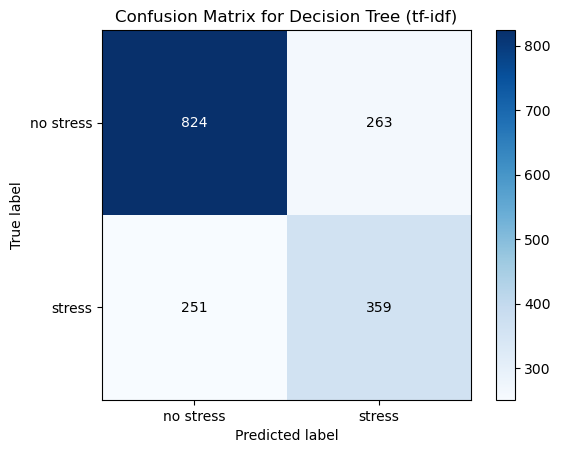

In [44]:
skplt.metrics.plot_confusion_matrix(y_test2, m3, normalize=False, title = 'Confusion Matrix for Decision Tree (tf-idf)')
plt.show()

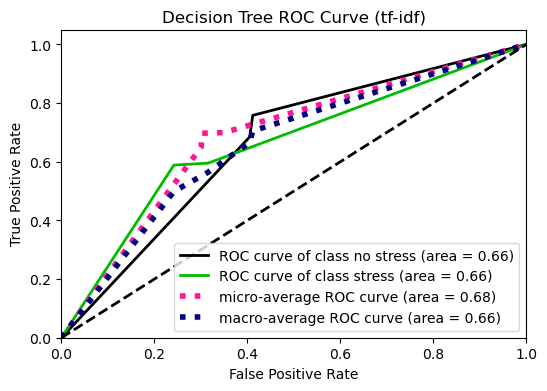

In [45]:
y_pred_proba = d.predict_proba(x_test2)

skplt.metrics.plot_roc_curve(y_test2, y_pred_proba,
                       title="Decision Tree ROC Curve (tf-idf)", figsize=(6, 4));

## Part 3

#### Visualizing the comparison

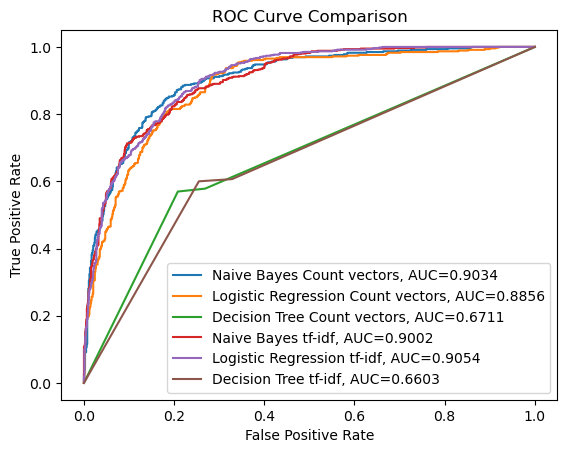

In [46]:
plt.figure(0).clf()

mb=MultinomialNB()
m2 = LogisticRegression()
d=DecisionTreeClassifier()

m1=mb.fit(x_train,y_train).predict(x_test)
y_pred_proba = mb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='stress')
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Naive Bayes Count vectors, AUC="+str(auc))

m2.fit(x_train, y_train)
y_pred_proba = m2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='stress')
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Logistic Regression Count vectors, AUC="+str(auc))

d.fit(x_train,y_train)
y_pred_proba = d.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='stress')
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Decision Tree Count vectors, AUC="+str(auc))

m1=mb.fit(x_train2,y_train2).predict(x_test2)
y_pred_proba = mb.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_proba, pos_label='stress')
auc = round(metrics.roc_auc_score(y_test2, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Naive Bayes tf-idf, AUC="+str(auc))

m2.fit(x_train2, y_train2)
y_pred_proba = m2.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_proba, pos_label='stress')
auc = round(metrics.roc_auc_score(y_test2, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Logistic Regression tf-idf, AUC="+str(auc))

d.fit(x_train2,y_train2)
y_pred_proba = d.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_proba, pos_label='stress')
auc = round(metrics.roc_auc_score(y_test2, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Decision Tree tf-idf, AUC="+str(auc))

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### Which model performed the best?
* The model that performed the best was the logistic regression model using tf-idf vectors
* The logistic regression model also performed well using count vectors
* This model had the highest accuracy as well as best ROC curve results
* The Naive Bayes model also performed quite well, slightly better using tf-idf than count vectors
* The decision tree models performance was not to the standard of the other models

#### Viewing some features
* (20 features of strongest importance on each side)
* Now that we know which model performed the best, lets look at which features drove its performance

In [47]:
feature_names = vect2.get_feature_names()
importance = m2.coef_[0]
fi = pd.Series(importance)
importance = [(feature_names[i], fi[i]) for i in range(0,2000)]
feature_df = pd.DataFrame(importance)
feature_df.columns = ['feature', 'importance']
feature_df = feature_df.sort_values(by = 'importance')
feature_df = feature_df.reset_index(drop=True)

#### Tf-idf features that tend to 'no stress'
* Some of the features don't make much sense, such as the numbers and 'bot', however many of the others are positive adjectives that do make sense

In [48]:
feature_df.head(20)

,feature,importance
0,amazing,-1.497830
1,beautiful,-1.372392
2,better,-0.919985
3,awesome,-0.841019
4,birthday,-0.723007
5,15,-0.579276
6,began,-0.538972
7,adorable,-0.526680
8,background,-0.523226
9,agreed,-0.522525


#### Tf-idf features that tend to 'stress'
* Firstly, there are more stress features than no stress, and they have higher importance in general than the no stress features
* These features seem to make more consistent sense than the no stress features as well

In [49]:
feature_df.tail(20)

,feature,importance
1980,ass,0.703349
1981,brother,0.711588
1982,appointment,0.715241
1983,afford,0.763876
1984,abused,0.786586
1985,ashamed,0.787970
1986,bf,0.887760
1987,broke,0.908442
1988,brain,0.935445
1989,attacks,0.937436


#### Creating a function for the final model

In [50]:
def stress_test_lr_tfidf(x):
        
    p1 = vect2.transform([user_input]).toarray()
    op1 = m2.predict(p1)
    print("Using the Logistic Regression model...")
    if op1 == 'stress':
        print("...This input indicated that the user is stressed\n")
    if op1 == 'no stress':
        print("...This input indicated that the user is NOT stressed\n")

#### Testing some user input sentences!

In [51]:
user_input = input("Enter a sentence: ")
stress_test_lr_tfidf(user_input)

Enter a sentence: I feel like I'm having a panic attack
Using the Logistic Regression model...
...This input indicated that the user is stressed



In [52]:
user_input = input("Enter a sentence: ")
stress_test_lr_tfidf(user_input)

Enter a sentence: Don't give up, awesome things are coming!
Using the Logistic Regression model...
...This input indicated that the user is NOT stressed



In [53]:
user_input = input("Enter a sentence: ")
stress_test_lr_tfidf(user_input)

Enter a sentence: I have an appointment coming up but I don't know if I can afford it
Using the Logistic Regression model...
...This input indicated that the user is stressed



#### Final thoughts
* Overall several of the models had good performance, with the logistic regression model using tf-idf vectors doing the best and being selected for the final model
* In order to improve the model in the future, I would look to improve the dataset
* This would mean using a larger dataset, possibly trying out using more or less subreddit sources
* I also would like to see the dataset be more balanced between categories of stress and no stress, as well as being able to include confidence values and only using data where the confidence of stress or no stress is high